# Projet de Signaux et systèmes
### Définition des variables

# Todos
- Mettres les yticks correctement
- Passer les angles en degré sur les graphiques
- Faire les graphiques pour theta aussi pour le point 7
- Eviter le franglais


In [1]:
from math import pi, sin, tan, atan
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

t0, tf = 0, 100 # s
v0 = 10 # m/s
a, b = 1.1, 3.3 # m



### Définition du système

In [2]:
def alpha(t, delta):
    return atan(a*tan(delta(t))/b)

def syst(t, y, delta):
    yt, theta = y
    dy = v0*sin(alpha(t, delta) + theta)
    dtheta = v0*sin(alpha(t, delta))/a
    return dy, dtheta

# Différentes fonctions delta qui seront utilisées par la suite
def delta_sinus(t):
    return -(pi/2)*sin(2*pi*0.1*t)

def delta_0(t):
    return 0

def delta_3(t):
    return 3 * (2* pi) / 360

def delta_15(t):
    return 15 * (2* pi) / 360

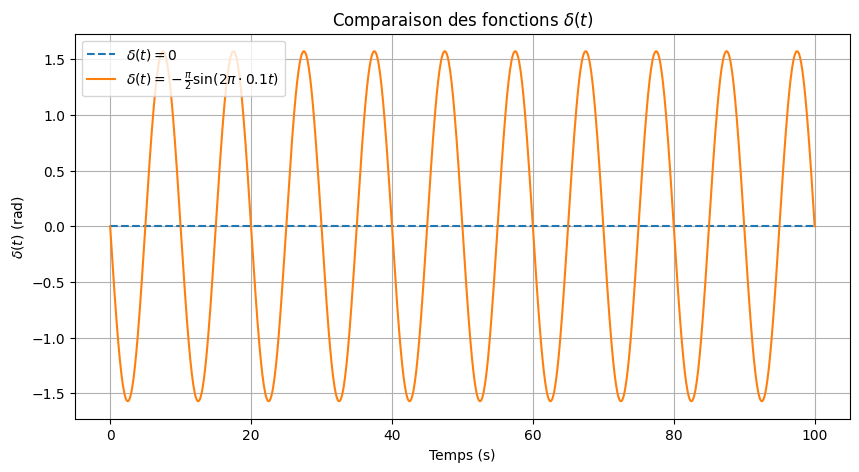

In [3]:

# Différentes fonctions delta qui seront utilisées par la suite
def delta_sinus(t):
    return -(np.pi / 2) * np.sin(2 * np.pi * 0.1 * t)


def delta_0(t):
    return np.zeros_like(t)

#Graphique des deltas =0 et delta = -pi/2*sin(2*pi*0.1*t)

def plot_delta():
    t = np.linspace(t0, tf, 1000)
    delta0 = delta_0(t)
    delta_sin = delta_sinus(t)

    plt.figure(figsize=(10, 5))
    plt.plot(t, delta0, label=r'$\delta(t) = 0$', linestyle='--')
    plt.plot(t, delta_sin, label=r'$\delta(t) = -\frac{\pi}{2} \sin(2\pi \cdot 0.1 t)$')

    plt.xlabel("Temps (s)")
    plt.ylabel(r"$\delta(t)$ (rad)")
    plt.title("Comparaison des fonctions $\delta(t)$")
    plt.legend()
    plt.grid(True)
    plt.show()

# Appel de la fonction pour afficher le graphe
plot_delta()

### 3. Résolution du système
#### Pour l'angle de braquage qui varie

Text(0.5, 1.0, 'Angle lorsque $\\delta(t) = \\frac{\\pi}{2}\\sin \\left( 2 \\pi \\times 0.1 \\times t \\right)$, avec $y_0=0$ et $\\theta_0=0$')

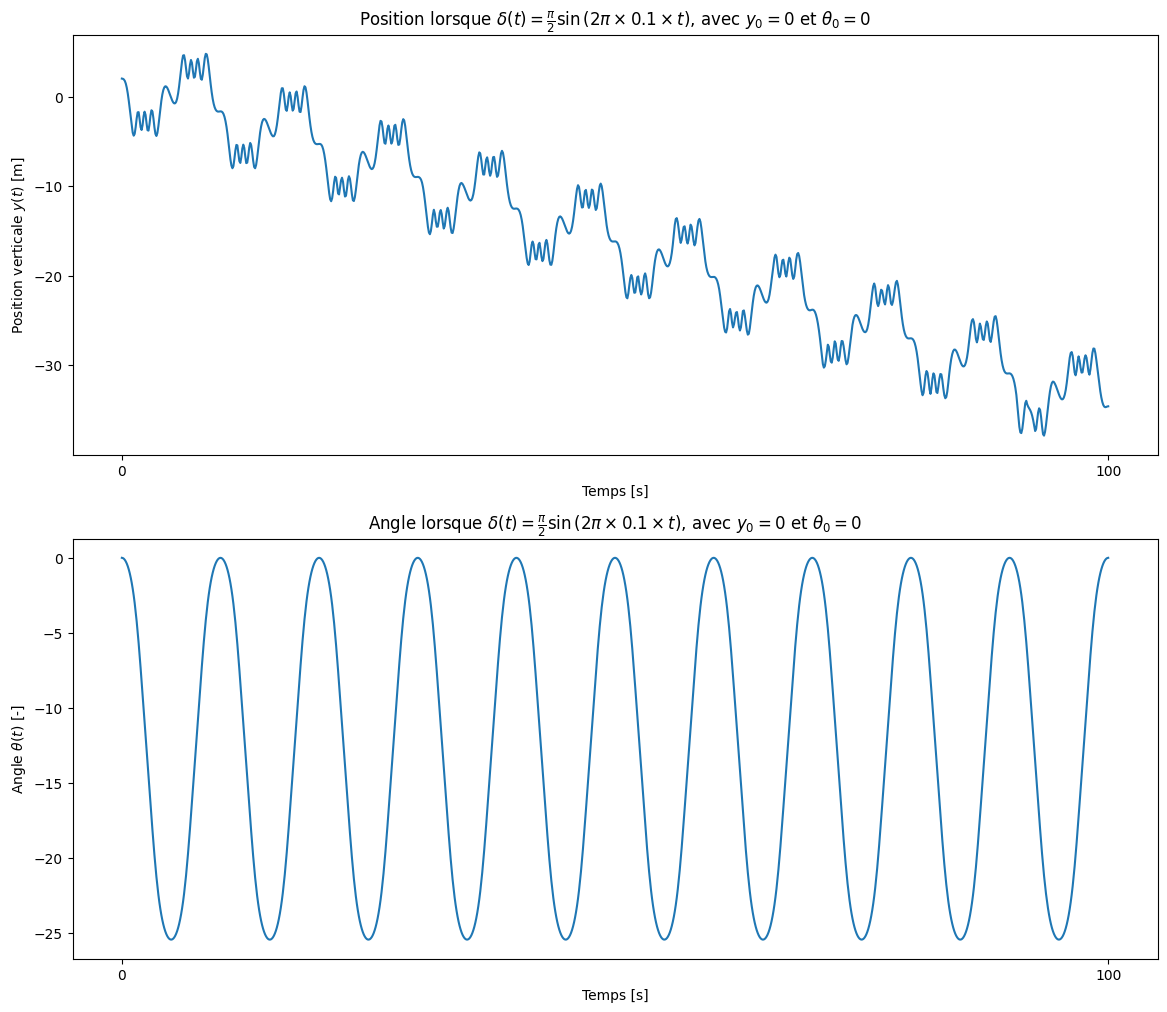

In [4]:
y0, theta0 = 2, 0 # conditions initiales
t_interval = np.linspace(0, 100, 1000) # points pour évaluer les fonctions


sol1 = sc.integrate.solve_ivp(syst, [t0, tf], [y0, theta0], t_eval = t_interval, args=[delta_sinus])

fig1, ax1 = plt.subplots(nrows=2, figsize = (14, 12))


ax1[0].plot(sol1["t"], sol1["y"][0]) 
ax1[0].set_xlabel("Temps [s]")
ax1[0].set_ylabel(r'Position verticale $y(t)$ [m]')
ax1[0].set_xticks([0, 100])
ax1[0].set_title(r'Position lorsque $\delta(t) = \frac{\pi}{2}\sin \left( 2 \pi \times 0.1 \times t \right)$, avec $y_0=0$ et $\theta_0=0$')

ax1[1].plot(sol1["t"], sol1["y"][1])
ax1[1].set_xlabel("Temps [s]")
ax1[1].set_ylabel(r'Angle $\theta(t)$ [-]')
ax1[1].set_xticks([0, 100])
ax1[1].set_title(r'Angle lorsque $\delta(t) = \frac{\pi}{2}\sin \left( 2 \pi \times 0.1 \times t \right)$, avec $y_0=0$ et $\theta_0=0$')



#### Pour l'angle de braquage = 0

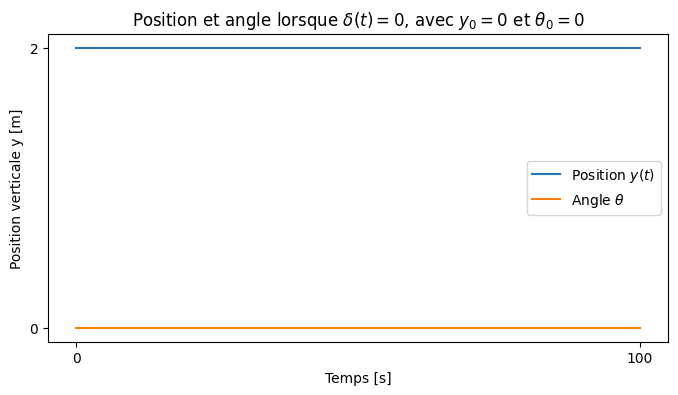

In [5]:
sol2 = sc.integrate.solve_ivp(syst, [t0, tf], [y0, theta0], t_eval = t_interval, args=[delta_0])

plt.figure(figsize= (8, 4))
plt.plot(sol2["t"], sol2["y"][0], label=r'Position $y(t)$')    # only plotting q, here
plt.plot(sol2["t"], sol2["y"][1], label=r'Angle $\theta$')
plt.xlabel("Temps [s]")
plt.ylabel("Position verticale y [m]")
plt.yticks([0,2])
plt.xticks([0, 100])
plt.title(r'Position et angle lorsque $\delta(t)=0$, avec $y_0=0$ et $\theta_0=0$')
plt.legend()
#plt.xlim(0,100)
plt.show()

### 7. Simuler aux conditions initiales
#### Modèle non-linéarisé


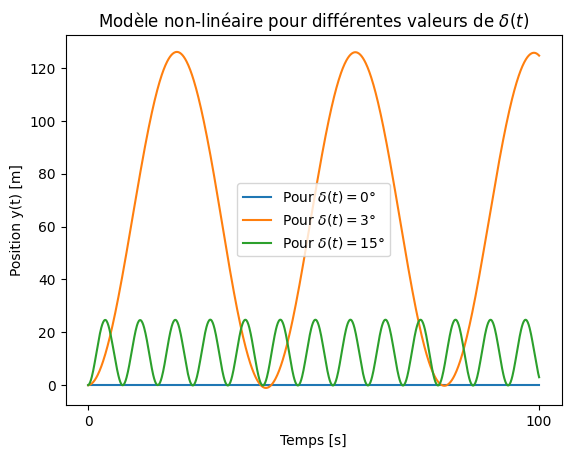

In [6]:
y0, theta0 = 0, 0

sol_non_lin_0 = sc.integrate.solve_ivp(syst, [t0, tf], [y0, theta0], t_eval = t_interval, args=[delta_0])

sol_non_lin_3 = sc.integrate.solve_ivp(syst, [t0, tf], [y0, theta0], t_eval = t_interval, args=[delta_3])

sol_non_lin_15 = sc.integrate.solve_ivp(syst, [t0, tf], [y0, theta0], t_eval = t_interval, args=[delta_15])
plt.figure()

plt.plot(sol_non_lin_0["t"], sol_non_lin_0["y"][0], label=r'Pour $\delta(t)=0°$ ') 
plt.plot(sol_non_lin_3["t"], sol_non_lin_3["y"][0], label=r'Pour $\delta(t)=3°$') 
plt.plot(sol_non_lin_15["t"], sol_non_lin_15["y"][0], label=r'Pour $\delta(t)=15°$') 
plt.xticks([0, 100])
plt.xlabel(r'Temps [s]')
plt.ylabel(r'Position y(t) [m]')
plt.title(r'Modèle non-linéaire pour différentes valeurs de $\delta(t)$')

plt.legend()
plt.show()


#### Modèle linéarisé A, B, C, D

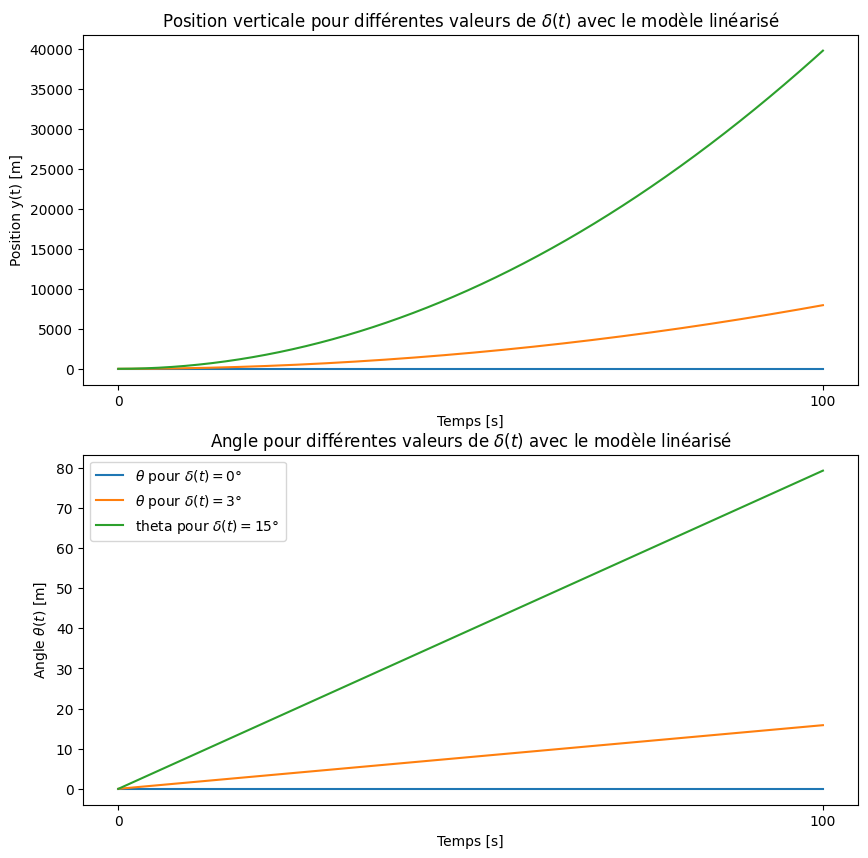

In [7]:
A = np.matrix([[0, v0], 
               [0, 0]])

B = np.matrix([[(a/b)*v0],
               [v0/b]] )

C = np.matrix([1, 0]) #! verif que c'est pas l'inverse
D = np.matrix([0])

y0 , theta0 = 0, 0

def systABCD(t, y, delta):
    Y = np.matrix([[y[0]], 
                   [y[1]]])
    
    X = (A * Y) + (B * delta(t))

    dy = X[0,0]
    dtheta = X[1,0]
    
    return dy, dtheta

sol_ABCD_0 = sc.integrate.solve_ivp(systABCD, [t0, tf], [y0, theta0], t_eval = t_interval, args=[delta_0])

sol_ABCD_3 = sc.integrate.solve_ivp(systABCD, [t0, tf], [y0, theta0], t_eval = t_interval, args=[delta_3])

sol_ABCD_15 = sc.integrate.solve_ivp(systABCD, [t0, tf], [y0, theta0], t_eval = t_interval, args=[delta_15])

fig2, ax2 = plt.subplots(nrows=2, figsize=(10,10))
#ax2[0].figure(figsize=(10,4))
ax2[0].plot(sol_ABCD_0["t"], sol_ABCD_0["y"][0], label=r'ABCD, $\delta(t)=0°$ ') 
ax2[0].plot(sol_ABCD_3["t"], sol_ABCD_3["y"][0], label=r'ABCD, $\delta(t)=3°$ ') 
ax2[0].plot(sol_ABCD_15["t"], sol_ABCD_15["y"][0], label=r'ABCD, $\delta(t)=15°$ ')
ax2[0].set_ylabel(r'Position y(t) [m]')
ax2[0].set_xlabel(r'Temps [s]')
ax2[0].set_xticks([0, 100])
ax2[0].set_title(r'Position verticale pour différentes valeurs de $\delta(t)$ avec le modèle linéarisé')

ax2[1].plot(sol_ABCD_0["t"], sol_ABCD_0["y"][1], label=r'$\theta$ pour $\delta(t)=0°$ ') 
ax2[1].plot(sol_ABCD_3["t"], sol_ABCD_3["y"][1], label=r'$\theta$ pour $\delta(t)=3°$ ') 
ax2[1].plot(sol_ABCD_15["t"], sol_ABCD_15["y"][1], label=r'theta pour $\delta(t)=15°$ ')
ax2[1].set_ylabel(r'Angle $\theta(t)$ [m]')
ax2[1].set_xlabel(r'Temps [s]')
ax2[1].set_xticks([0, 100])

ax2[1].set_title(r'Angle pour différentes valeurs de $\delta(t)$ avec le modèle linéarisé')

plt.legend()
plt.show()

### 8. Trajectoire

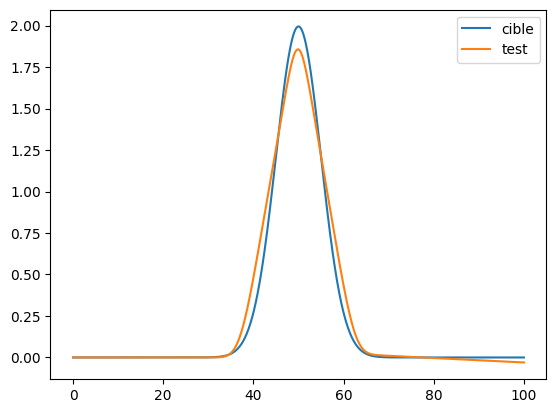

Mean square error : 0.005477100281364065


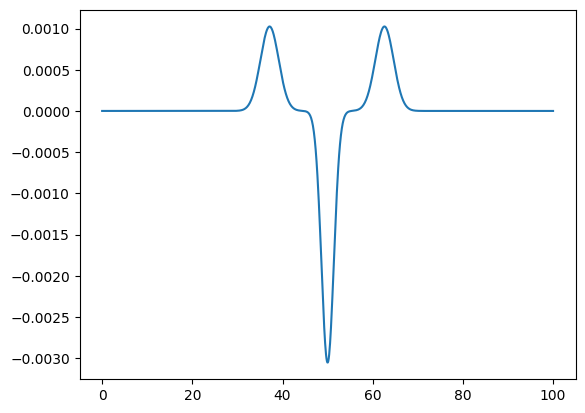

In [8]:
mu_obj = 50
sigma_obj = 5

def objectif_trajectoire(t):
    return (25/ (np.sqrt(2*np.pi* np.power(sigma_obj, 2))) ) * np.exp( - ( np.power((t-mu_obj),2))/(2*np.power(sigma_obj,2)) )


def delta_exp(t, A, mu, sigma):
    return (A/ (np.sqrt(2*np.pi* np.power(sigma, 2))) ) * np.exp( - ( np.power((t-mu),2))/(2*np.power(sigma,2)) )


def combinaison_gaussiennes(t, A1, A2, mu1, mu3, sigma1, sigma2):
    return delta_exp(t, A1, mu1, sigma1) + delta_exp(t, A2, 50, sigma2) + delta_exp(t, A1, mu3, sigma1)

""" 
pour une gaussienne :
mu = position du max => mu2 = 50 par symétrie
sigma = "hauteur du pic" => sigma1 = sigma3 par symetrie
A = amplitude => A1 = A3 par symétrie
"""



y_cible = objectif_trajectoire(t_interval)

def fonction_erreur(params):
    A1, A2, mu1, mu3, sigma1, sigma2 = params
    sol = sc.integrate.solve_ivp(syst, [t0, tf], [y0, theta0], t_eval = t_interval, args=[lambda t: combinaison_gaussiennes(t, A1, A2, mu1, mu3, sigma1, sigma2)])
    
    y_actuel = sol["y"][0]

    #print(np.mean(np.power((y_cible - y_actuel),2)))
    return np.mean(np.power((y_cible - y_actuel),2))

#resultat = sc.optimize.minimize(fonction_erreur, [5.20452627e-03, -1.04731637e-02,  6.26096336e+01,  3.71312045e+01, 2.02511091e+00,  1.36745151e+00], method='Nelder-Mead', options={'disp': True})
resultat = sc.optimize.minimize(fonction_erreur, [5.20452627e-03, -1.04731637e-02,  6.26096336e+01,  3.71312045e+01, 2.02511091e+00,  1.36745151e+00], method='L-BFGS-B', options={'disp': True, 'ftol': 1e-9, 'gtol': 1e-9})

#[0.005, -0.01, 50, 50, 2, 1.5]

# paramètres optimaux
A1, A2, mu1, mu3, sigma1, sigma2 = resultat.x

sol_trouvee = sc.integrate.solve_ivp(syst, [t0, tf], [y0, theta0], t_eval = np.linspace(t0, tf, 1000), args=[lambda t: combinaison_gaussiennes(t, A1, A2, mu1, mu3, sigma1, sigma2)])

plt.figure()
plt.plot(t_interval, y_cible, label='cible')
plt.plot(sol_trouvee["t"], sol_trouvee["y"][0], label ='test')
plt.legend()
plt.show()

print(f'Mean square error : {resultat.fun}') # min square erreur obtenue quand on evalue avec les paramètres trouvés
from functools import partial
entree = partial(combinaison_gaussiennes, A1=A1, A2=A2, mu1=mu1, mu3=mu3, sigma1=sigma1, sigma2=sigma2)
a = np.vectorize(entree)(t_interval)
plt.figure()
plt.plot(t_interval, a, label='combinaison gaussienne')
plt.show()